In [1]:
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import seaborn as sns

In [2]:
scores_df = pd.read_csv('sat_gpa_v1.csv')
scores_df.head()

,sat_sum,fy_gpa
0,1270,3.18
1,1220,3.33
2,1160,3.25
3,950,2.42
4,1070,2.63


In [3]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  1000 non-null   int64  
 1   fy_gpa   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


## Scatter plot representing the relationship between GPA and SAT scores

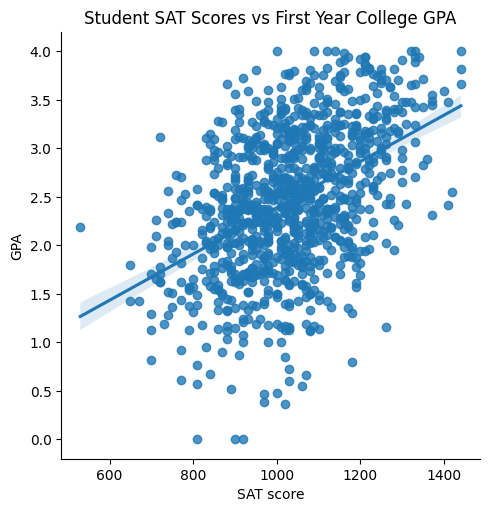

In [5]:
sns.lmplot(data=scores_df, x='sat_sum', y='fy_gpa').set(title='Student SAT Scores vs First Year College GPA', xlabel='SAT score', ylabel='GPA')

## Linear regression model

In [6]:
pipeline = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.linear_model.LinearRegression())

In [7]:
x = scores_df.drop('fy_gpa', axis='columns')
y = scores_df['fy_gpa']

In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [9]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [10]:
y_pred = pipeline.predict(x_test)
sklearn.metrics.r2_score(y_test, y_pred)

0.2235291085973402

## Statistical interpretation of regression model results

with a result of roughly .21, we can assume that SAT scores are not a very good indicator of college GPA, there is a slight trend (the r2 score is higher than zero), but it is still very low compared to a perfect score of 1. This aligns with the scatter plot results showing a slight trend up but not a very strong connection between the y axis and x axis